<a href="https://colab.research.google.com/github/whisplnspace/pretrainedclassifier-/blob/main/pretrainedclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

In [3]:
!pip install numpy

In [6]:
!pip install matplotlib

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


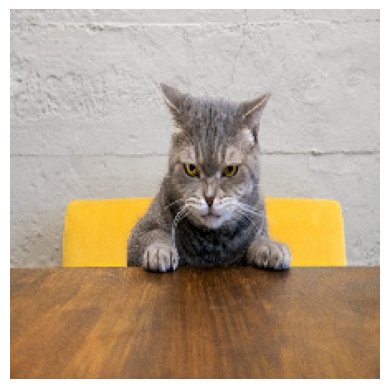

1: tabby (72.83%)
2: Egyptian_cat (10.61%)
3: carton (5.14%)


In [7]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Function to preprocess and predict the image
def predict_image(img_path):
    # Load the image with target size of 224x224 as required by MobileNetV2
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)

    # Expand dimensions to match the input shape required by the model (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the image (normalizes input image in the way expected by MobileNetV2)
    img_array = preprocess_input(img_array)

    # Make prediction
    predictions = model.predict(img_array)

    # Decode the predictions to human-readable labels
    decoded_predictions = decode_predictions(predictions, top=3)[0]

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Print the predictions
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i+1}: {label} ({score*100:.2f}%)")

# Example usage: Predict a cat image
predict_image('/content/cat2.jpg')  # Replace with the path to your image
